In [2]:
pip install ucimlrepo

In [3]:
#Summary of dataset - Feature Types and Missing Value Check

from ucimlrepo import fetch_ucirepo

#Access to the dataset
higher_education_students_performance_evaluation = fetch_ucirepo(id=697)

# Data as Panda dataframes
X = higher_education_students_performance_evaluation.data.features
y = higher_education_students_performance_evaluation.data.targets

# Number of rows and columns
print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)

# Total number of samples
print("No.samples:", X.shape[0])

# Total number of features
print("No. features:", X.shape[1])

# Metadata - General info about the dataset, inlcuding header, role, and data type
print(higher_education_students_performance_evaluation.metadata)

# Variable information - Info about variables and whether there are missing values
print(higher_education_students_performance_evaluation.variables)



Features shape (X): (4424, 36)
Target shape (y): (4424, 1)
No.samples: 4424
No. features: 36
{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classificatio

In [12]:
#Categorical Feature Counts

import pandas as pd
from ucimlrepo import fetch_ucirepo

# Step 1: Load the dataset
dataset = fetch_ucirepo(id=697)
X = dataset.data.features

# Data type of each column
dtypes = X.dtypes

#Count by type
num_int = (dtypes == 'int64').sum()
num_float = (dtypes == 'float64').sum()
num_object = (dtypes == 'object').sum()

print("Counts for each feature type:")
print(f"Integer features: {num_int}")
print(f"Continuous features: {num_float}")
print(f"Categorical features: {num_object}")

Counts for each feature type:
Integer features: 29
Continuous features: 7
Categorical features: 0


In [13]:
#Corrleation between the numeric features to the target variable using Pearson correlation

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

# Load dataset
dataset = fetch_ucirepo(id=856)
X = dataset.data.features
y = dataset.data.targets

# Encode target labels - converting categorical labels into numeric codes & turning the numpy array to a 1-dimensional array
y_encoded = LabelEncoder().fit_transform(y.values.ravel())

# Pearson correlation between each numeric feature to the target, showing their absolute correlation strength
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
correlation_df = X[numeric_cols].corrwith(pd.Series(y_encoded)).abs().sort_values(ascending=False).to_frame(name='Correlation')

# Show results
print("Pearson Correlation (Numeric Features):\n", correlation_df)

Pearson Correlation (Numeric Features):
                                                     Correlation
Sex                                                    0.335533
Cumulative grade point average in the last seme...     0.315493
Expected Cumulative grade point average in the ...     0.248588
Impact of your projects/activities on your success     0.203273
Reading frequency (non-scientific books/journals)      0.195617
Attendance to the seminars/conferences related ...     0.184763
Additional work                                        0.167445
Total salary if available                              0.166352
Transportation to the university                       0.156289
Discussion improves my interest and success in ...     0.146547
Course ID                                              0.142166
Attendance to classes                                  0.139564
Flip-classroom                                         0.110617
Graduated high-school type                             0.104821

In [14]:
# Mean and Correlation
# Select continuous and integer columns
numeric_X = X.select_dtypes(include=['int64', 'float64'])

# Calculate mean and standard deviation
means = numeric_X.mean()
stds = numeric_X.std()

# Combine into one DataFrame
summary = pd.DataFrame({
    'Mean': means,
    'Standard Deviation': stds
})

# Display the summary
print("Mean and Standard Deviation of Each Feature:")
print(summary)

Mean and Standard Deviation of Each Feature:
                                                        Mean  \
Student Age                                         1.620690   
Sex                                                 1.600000   
Graduated high-school type                          1.944828   
Scholarship type                                    3.572414   
Additional work                                     1.662069   
Regular artistic or sports activity                 1.600000   
Do you have a partner                               1.579310   
Total salary if available                           1.627586   
Transportation to the university                    1.620690   
Accomodation type in Cyprus                         1.731034   
Mother's education                                  2.282759   
Father's education                                  2.634483   
Number of sisters/brothers (if available)           2.806897   
Parental status                                     1.17241

Target Distribution:
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


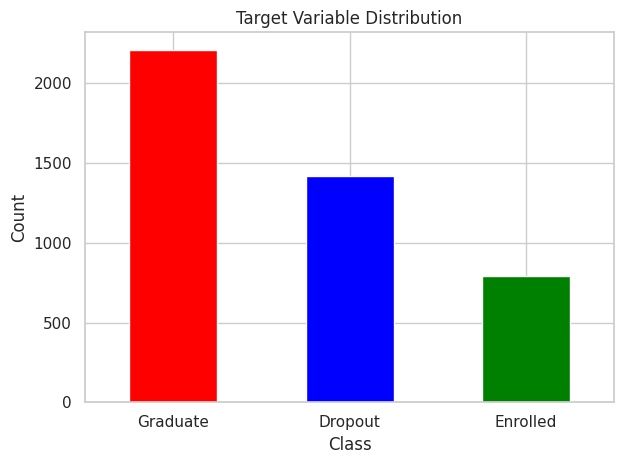

In [15]:
# Distribution of variables in target column

from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
dataset = fetch_ucirepo(id=697)
y = dataset.data.targets

# Flatten to 1D array
y = y.values.ravel()

# Show value counts
counts = pd.Series(y).value_counts()
print("Target Distribution:")
print(counts)

# Plot
counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Target Variable Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

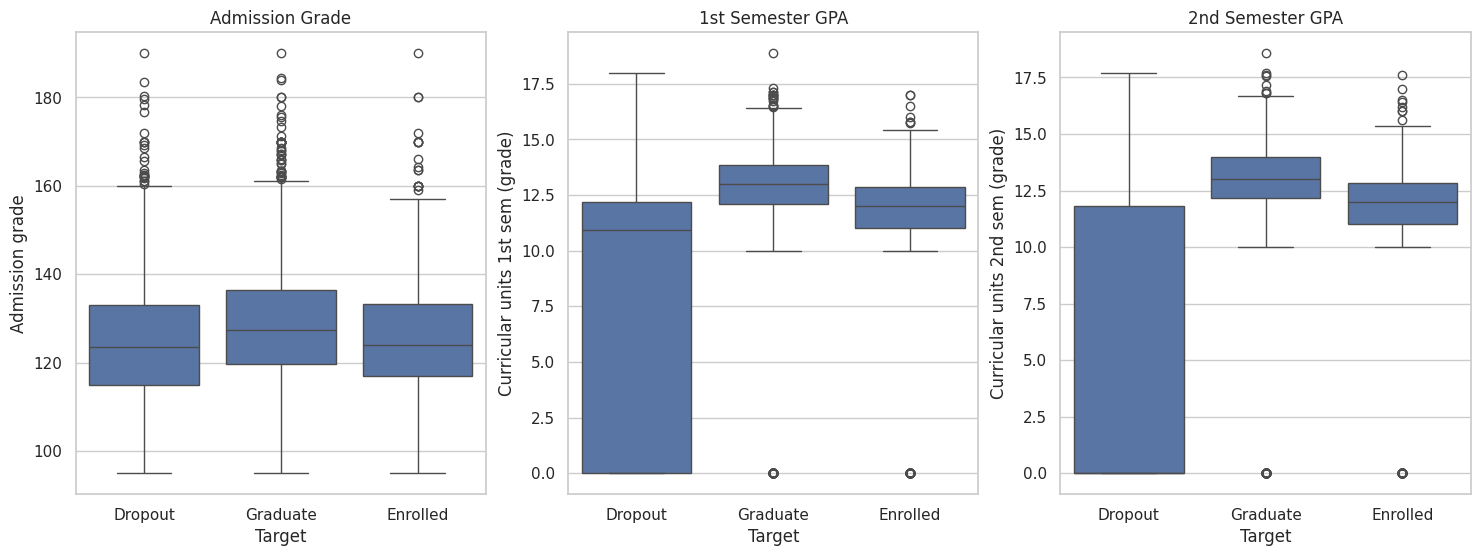

In [8]:
#Grade distribution under each target variable - Dropout/Enrolled/Graduate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
dataset = fetch_ucirepo(id=697)
df = dataset.data.original

# Clean column names
df.columns = df.columns.str.strip()

# Drop rows with missing data in required columns
cols_to_plot = [
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Target'
]
df_filtered = df.dropna(subset=cols_to_plot)

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot GPA distribution by target (Dropout/Enrolled/Graduate)
sns.boxplot(data=df_filtered, x='Target', y='Admission grade', ax=axes[0])
axes[0].set_title('Admission Grade')

sns.boxplot(data=df_filtered, x='Target', y='Curricular units 1st sem (grade)', ax=axes[1])
axes[1].set_title('1st Semester GPA')

sns.boxplot(data=df_filtered, x='Target', y='Curricular units 2nd sem (grade)', ax=axes[2])
axes[2].set_title('2nd Semester GPA')

plt.show()

In [9]:
#Handling Imbalanced Dataset - Method 1 - SMOTE analysis

from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load dataset
dataset = fetch_ucirepo(id=697)
df = dataset.data.original
df.columns = df.columns.str.strip()  # To remove spaces in column names

# Drop rows with missing target
df = df.dropna(subset=['Target'])

# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Define features and target
X = df_encoded.drop(columns=['Target'])
y = df_encoded['Target']

# Check class distribution before balancing
print("Original class distribution:", Counter(y))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Balanced class distribution:", Counter(y_train_smote))

# Train Random Forest model on balanced data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Evaluate on test data
y_pred = model.predict(X_test)
print("\nClassification Report after SMOTE training:")
print(classification_report(y_test, y_pred))

Original class distribution: Counter({2: 2209, 0: 1421, 1: 794})
Balanced class distribution: Counter({0: 1567, 2: 1567, 1: 1567})

Classification Report after SMOTE training:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       441
           1       0.49      0.49      0.49       245
           2       0.81      0.88      0.84       642

    accuracy                           0.76      1328
   macro avg       0.71      0.70      0.70      1328
weighted avg       0.76      0.76      0.76      1328



In [10]:
#Handling Imbalanced Dataset - Method 2 - Oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Check class distribution before oversampling
print("Before oversampling:", Counter(y_train))

# 2. Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# 3. Check class distribution after oversampling
print("After oversampling:", Counter(y_train_over))

# 4. Train a classifier on the oversampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_over, y_train_over)

# 5. Predict and evaluate on test set
y_pred = model.predict(X_test)
print("Performance after oversampling:")
print(classification_report(y_test, y_pred))

Before oversampling: Counter({2: 1567, 0: 980, 1: 549})
After oversampling: Counter({0: 1567, 2: 1567, 1: 1567})
Performance after oversampling:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       441
           1       0.57      0.46      0.51       245
           2       0.81      0.90      0.85       642

    accuracy                           0.78      1328
   macro avg       0.73      0.71      0.72      1328
weighted avg       0.77      0.78      0.77      1328



In [16]:
#Handling Imbalanced Dataset - Method 3 - Undersampling

from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling to the majority class (Enrolled & Graduate)
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Undersampled class distribution:", Counter(y_train_under))

# Train a simple model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_under, y_train_under)

# Evaluate
y_pred = model.predict(X_test)
print("Performance after undersampling:")
print(classification_report(y_test, y_pred))

Undersampled class distribution: Counter({0: 549, 1: 549, 2: 549})
Performance after undersampling:
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       441
           1       0.42      0.62      0.50       245
           2       0.84      0.79      0.82       642

    accuracy                           0.73      1328
   macro avg       0.70      0.70      0.69      1328
weighted avg       0.76      0.73      0.74      1328

